In [3]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
train_mean, train_std = x_train.mean(),x_train.std()
x_train = (x_train - train_mean)/train_std
x_test = (x_test - train_mean)/train_std

Epoch 1/300
1563/1563 [==============================] - 9s 4ms/step - loss: 1.6623 - sparse_categorical_accuracy: 0.3999 - val_loss: 1.3703 - val_sparse_categorical_accuracy: 0.5143
Epoch 2/300
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4224 - sparse_categorical_accuracy: 0.4893 - val_loss: 1.2799 - val_sparse_categorical_accuracy: 0.5467
Epoch 3/300
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3333 - sparse_categorical_accuracy: 0.5221 - val_loss: 1.2124 - val_sparse_categorical_accuracy: 0.5727
Epoch 4/300
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2689 - sparse_categorical_accuracy: 0.5501 - val_loss: 1.1577 - val_sparse_categorical_accuracy: 0.5939
Epoch 5/300
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2209 - sparse_categorical_accuracy: 0.5646 - val_loss: 1.1398 - val_sparse_categorical_accuracy: 0.6010
Epoch 6/300
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1780 -

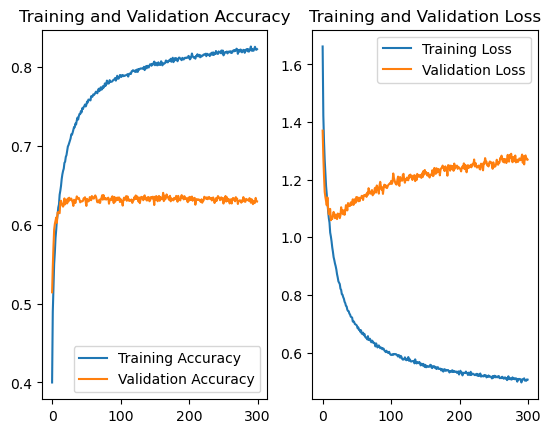

In [5]:
class Baseline(Model):
    def __init__(self):
        super(Baseline, self).__init__()
        self.c1 = Conv2D(filters=6, kernel_size=(5, 5), padding='same')  # 卷积层
        self.b1 = BatchNormalization()  # BN层
        self.a1 = Activation('relu')  # 激活层
        self.p1 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')  # 池化层
        self.d1 = Dropout(0.2)  # dropout层

        self.flatten = Flatten()
        self.f1 = Dense(128, activation='relu')
        self.d2 = Dropout(0.2)
        self.f2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.p1(x)
        x = self.d1(x)

        x = self.flatten(x)
        x = self.f1(x)
        x = self.d2(x)
        y = self.f2(x)
        return y


model = Baseline()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=300, validation_data=(x_test, y_test), validation_freq=1)
model.summary()



# 搞定，画图，显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

